# Importando paquetes

Importamos los paquetes necesarios para el proyecto

In [90]:
from numpy import savetxt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargando los datos

Cargar los datos https://docs.scipy.org/doc/numpy/reference/generated/numpy.load.html


In [80]:
data = np.load('data/proyecto_training_data.npy')
names = ["SalePrice", "OverallQual","1stFlrSF", "TotRmsAbvGrd", "YearBuilt", "LotFrontage"]
df = pd.DataFrame(data=data,columns=names) 
df.head()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
SalePrice       1460 non-null float64
OverallQual     1460 non-null float64
1stFlrSF        1460 non-null float64
TotRmsAbvGrd    1460 non-null float64
YearBuilt       1460 non-null float64
LotFrontage     1201 non-null float64
dtypes: float64(6)
memory usage: 68.6 KB


In [82]:
row_num = df.shape[0]
col_num = df.shape[1]
print('Number of rows', row_num)
print('Number of cols', col_num)

Number of rows 1460
Number of cols 6


In [83]:
train_rows_num = int(row_num*0.8)
train_df = df[:train_rows_num]
test_df = df[:-train_rows_num]

dftrain.shape[0]+dftest.shape[0]

1460

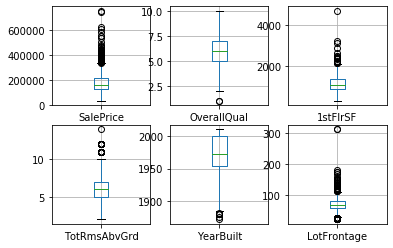

In [93]:
fig  = plt.figure()
i = 0
for column in df:
    i += 1
    fig.add_subplot(2,3,i)
    df.boxplot([column])
    
plt.show()


In [87]:
for index in range(col_num):
    print(names[index])
    print(df.iloc[:,index].describe(),'\n')

SalePrice
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64 

OverallQual
count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64 

1stFlrSF
count    1460.000000
mean     1162.626712
std       386.587738
min       334.000000
25%       882.000000
50%      1087.000000
75%      1391.250000
max      4692.000000
Name: 1stFlrSF, dtype: float64 

TotRmsAbvGrd
count    1460.000000
mean        6.517808
std         1.625393
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        14.000000
Name: TotRmsAbvGrd, dtype: float64 

YearBuilt
count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973

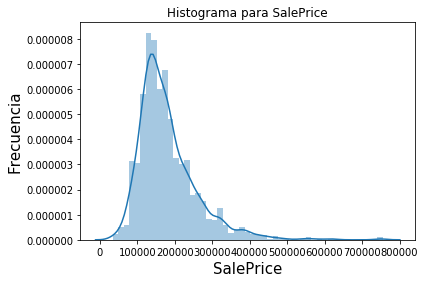

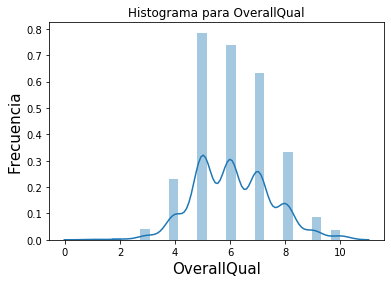

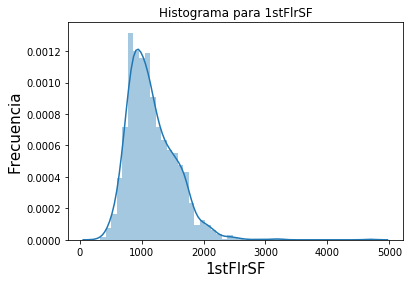

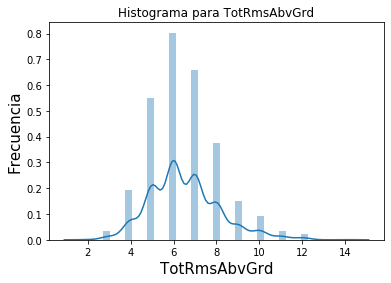

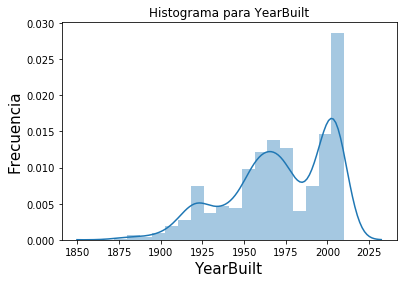

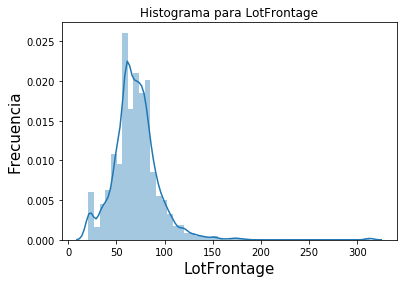

In [108]:
i = 0

for column in df:
    x = np.array(df[column])
    x = x[~np.isnan(x)]
    concat_name = "Histograma para " + names[i]
    sns.distplot(x).set_title(concat_name)
    plt.xlabel(names[i], fontsize=15)
    plt.ylabel("Frecuencia",fontsize=15)
    plt.show()
    i += 1

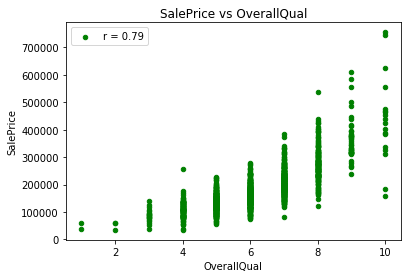

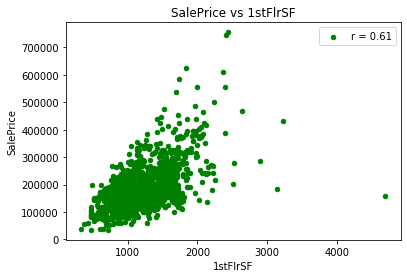

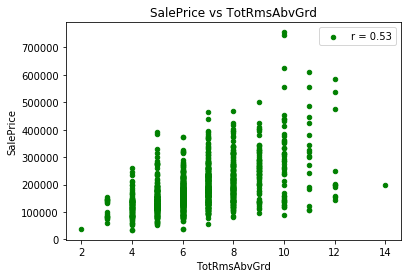

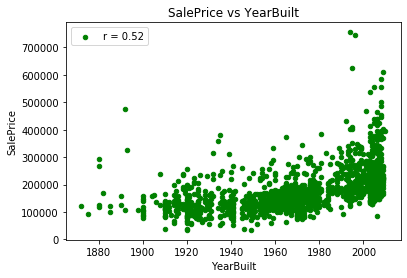

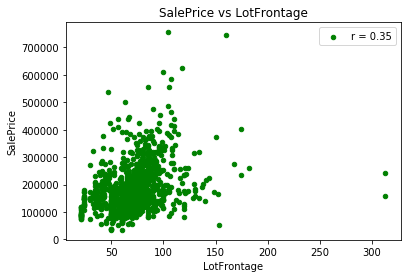

In [152]:
i = 0
for column in df:
    if i != 0:
        corr_num = df['SalePrice'].corr(df[column])
        label = 'r =' + ' {0:.2f}'.format(corr_num)
        title = 'SalePrice vs ' + names[i]   
        df.plot(x=names[i], y='SalePrice', kind='scatter',title=title, label=label,c = 'g') 
        plt.show()
        print()
    i += 1

Escojo OverallQual y 1stFlrSF dependientes a SalePrice

In [162]:
type(df.iloc[:,0:].values)



numpy.ndarray

In [218]:
def linear_regresion(x, y, epochs, imprimir_error_cada=100, lr = 0.0001):
    l = len(x)
    errors = []
    models = []
    m = 0
    b = 0
    parameters = np.array([[m,b]])
    matrix_x_t = np.matrix([x, np.full_like(x,1)]).T
    for index in range(epochs):
        yhat = np.dot(matrix_x_t, parameters.T).T
        error = 0.5 * np.mean(np.power(y - yhat,2))
        gradient = ((yhat - y) * matrix_x_t) / l
        parameters = parameters - gradient * lr

        errors.append(error)
        models.append([])
        models[index].append(parameters[0,0])
        models[index].append(parameters[0,1])

        if index % imprimir_error_cada == 0:
            print('Iteracion '+str(index))
            print(parameters)

    return models, errors 

In [219]:
x = np.array([65, 80, 68])
y = np.array([208.5, 181.5, 223.5])

m, e = linear_regresion(x,y,3)
print(e)
print(m)

Iteracion 0
[[1.44235 0.02045]]
[21061.125, 5542.5714866175, 1792.1806675481128]
[[1.44235, 0.02045], [2.1514083, 0.03065727], [2.499979794493, 0.035829205343]]
